In [1]:
%matplotlib inline

import cv2
import keras
from keras.applications.imagenet_utils import preprocess_input
from keras.backend.tensorflow_backend import set_session
from keras.models import Model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread
import tensorflow as tf

from ssd import SSD300
from ssd_utils import BBoxUtility


plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'

np.set_printoptions(suppress=True)

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.45
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
classes = ['ALB', 'DOL', 'NoF', 'SHARK', 'BET', 'LAG', 'OTHER', 'YFT']
NUM_CLASSES = len(classes) + 1

In [3]:
input_shape=(300, 300, 3)
model = SSD300(input_shape, num_classes=NUM_CLASSES)
model.load_weights('checkpoints/weights.05-1.13.hdf5', by_name=True)
bbox_util = BBoxUtility(NUM_CLASSES)

ResourceExhaustedError: OOM when allocating tensor with shape[3,3,512,1024]
	 [[Node: random_uniform_13 = Add[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"](random_uniform_13/mul, random_uniform_13/min)]]

Caused by op u'random_uniform_13', defined at:
  File "/usr/lib64/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib64/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 405, in start
    ioloop.IOLoop.instance().start()
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 212, in dispatch_shell
    handler(stream, idents, msg)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 370, in execute_request
    user_expressions, allow_stdin)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 175, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2902, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 3006, in run_ast_nodes
    if self.run_code(code, result):
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 3066, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-69d0f6c1b931>", line 2, in <module>
    model = SSD300(input_shape, num_classes=NUM_CLASSES)
  File "ssd.py", line 106, in SSD300
    name='fc6')(net['pool5'])
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/keras/engine/topology.py", line 546, in __call__
    self.build(input_shapes[0])
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/keras/layers/convolutional.py", line 436, in build
    constraint=self.W_constraint)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/keras/engine/topology.py", line 418, in add_weight
    weight = initializer(shape, name=name)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/keras/initializations.py", line 66, in glorot_uniform
    return uniform(shape, s, name=name)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/keras/initializations.py", line 33, in uniform
    return K.random_uniform_variable(shape, -scale, scale, name=name)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 634, in random_uniform_variable
    low, high, dtype=tf_dtype, seed=seed)(shape)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/tensorflow/python/ops/init_ops.py", line 180, in __call__
    dtype, seed=self.seed)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/tensorflow/python/ops/random_ops.py", line 245, in random_uniform
    return math_ops.add(rnd * (maxval - minval), minval, name=name)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/tensorflow/python/ops/gen_math_ops.py", line 73, in add
    result = _op_def_lib.apply_op("Add", x=x, y=y, name=name)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/a/h/jsendi01/Envs/deep-venv/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[3,3,512,1024]
	 [[Node: random_uniform_13 = Add[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"](random_uniform_13/mul, random_uniform_13/min)]]


In [5]:
inputs = []
images = []
DATA_PATH = '/a/data/fisheries_monitoring/data/test_stg2/'

for i in range(5):
    img_path = DATA_PATH + ('image_%05i.jpg' % np.random.randint(10524))
    img = image.load_img(img_path, target_size=(300, 300))
    img = image.img_to_array(img) / 255
    images.append(imread(img_path))
    inputs.append(img.copy())
    
inputs = preprocess_input(np.array(inputs))

In [6]:
preds = model.predict(inputs, batch_size=1, verbose=1)

5/5 [==============================] - 1s     


In [7]:
results = bbox_util.detection_out(preds)

In [7]:
%%time
a = model.predict(inputs, batch_size=1)
b = bbox_util.detection_out(preds)

CPU times: user 96 ms, sys: 4 ms, total: 100 ms
Wall time: 241 ms


[ 0.02200247  0.01541243]


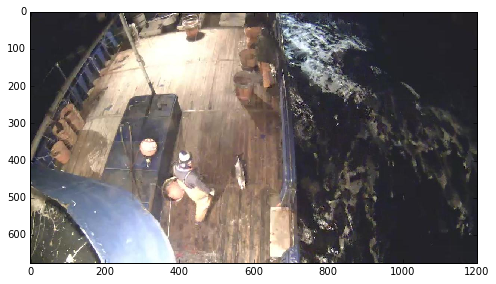

[ 0.01524091]


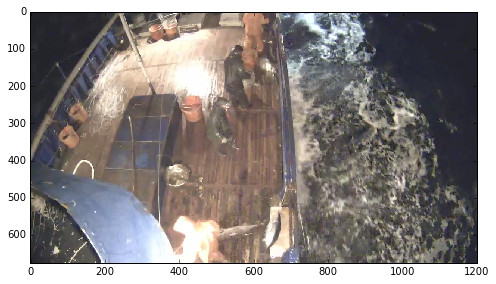

[ 0.02721484  0.01018116]


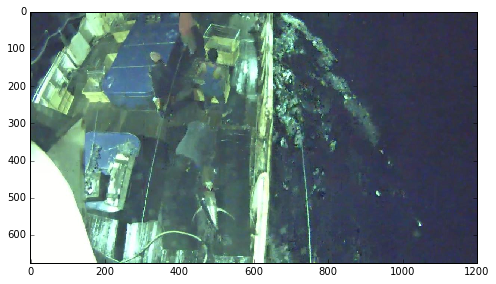

[ 0.0430218   0.02374866]


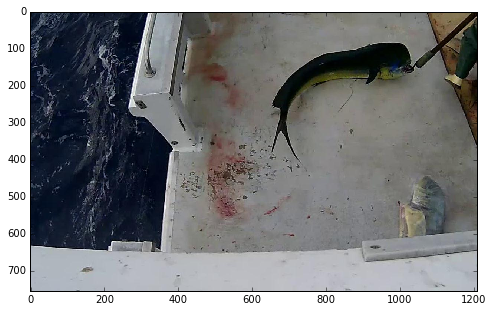

[ 0.01089983]


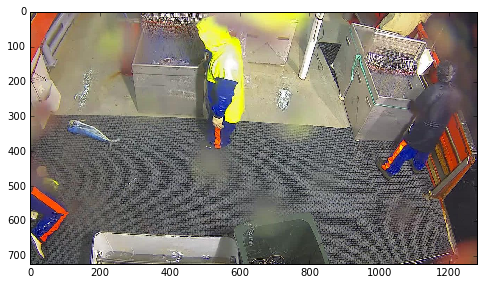

In [16]:
for i, img in enumerate(images):
    # Parse the outputs.
    det_label = results[i][:, 0]
    det_conf = results[i][:, 1]
    det_xmin = results[i][:, 2]
    det_ymin = results[i][:, 3]
    det_xmax = results[i][:, 4]
    det_ymax = results[i][:, 5]

    # Get detections with confidence higher than 0.6.
    top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.6]

    top_conf = det_conf[top_indices]
    top_label_indices = det_label[top_indices].tolist()
    top_xmin = det_xmin[top_indices]
    top_ymin = det_ymin[top_indices]
    top_xmax = det_xmax[top_indices]
    top_ymax = det_ymax[top_indices]

    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

    plt.imshow(img / 255.)
    currentAxis = plt.gca()

    for i in range(top_conf.shape[0]):
        xmin = int(round(top_xmin[i] * img.shape[1]))
        ymin = int(round(top_ymin[i] * img.shape[0]))
        xmax = int(round(top_xmax[i] * img.shape[1]))
        ymax = int(round(top_ymax[i] * img.shape[0]))
        score = top_conf[i]
        print xmin
        label = int(top_label_indices[i])
        label_name = classes[label - 1]
        display_txt = '{:0.2f}, {}'.format(score, label_name)
        coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
        color = colors[label]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})
    
    plt.show()